In [103]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import ydata_profiling as pp
from ydata_profiling import ProfileReport
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


In [104]:
df = pd.read_csv("C:\\Users\\dj\\Downloads\\heart_failure_clinical_records2.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,serum_sodium,high_blood_pressure,serum_sodium.1,sex,smoking,time,DEATH_EVENT
0,55,0,748.0,0,45,0,137,1,1,88,0
1,65,0,56.0,0,25,0,130,1,0,207,0
2,45,0,582.0,1,38,0,140,0,0,244,0
3,60,1,754.0,1,40,1,126,1,0,90,0
4,95,1,582.0,0,30,0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,45,0,582.0,1,55,0,132,0,0,250,0
4996,60,1,582.0,0,30,1,145,0,0,95,0
4997,95,1,112.0,0,40,1,138,0,0,24,1
4998,65,1,160.0,1,20,0,116,0,0,8,1


In [105]:
df.isnull().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
serum_sodium                0
high_blood_pressure         0
serum_sodium.1              0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [106]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,serum_sodium,high_blood_pressure,serum_sodium.1,sex,smoking,time,DEATH_EVENT
0,55,0,748.0,0,45,0,137,1,1,88,0
1,65,0,56.0,0,25,0,130,1,0,207,0
2,45,0,582.0,1,38,0,140,0,0,244,0
3,60,1,754.0,1,40,1,126,1,0,90,0
4,95,1,582.0,0,30,0,132,1,0,50,1


In [107]:
pf = ProfileReport(df)

In [108]:
# pf.to_widgets()

In [109]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'serum_sodium', 'high_blood_pressure', 'serum_sodium.1', 'sex',
       'smoking', 'time', 'DEATH_EVENT'],
      dtype='object')

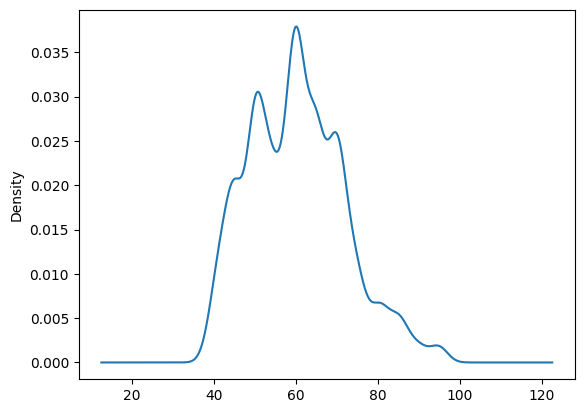

In [110]:
df['age'].plot(kind = 'kde')
plt.show()



C:\Users\dj\AppData\Local\Temp\ipykernel_9872\2621636440.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
c:\Users\dj\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dj\AppData\Local\Temp\ipykernel_9872\2621636440.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
sim

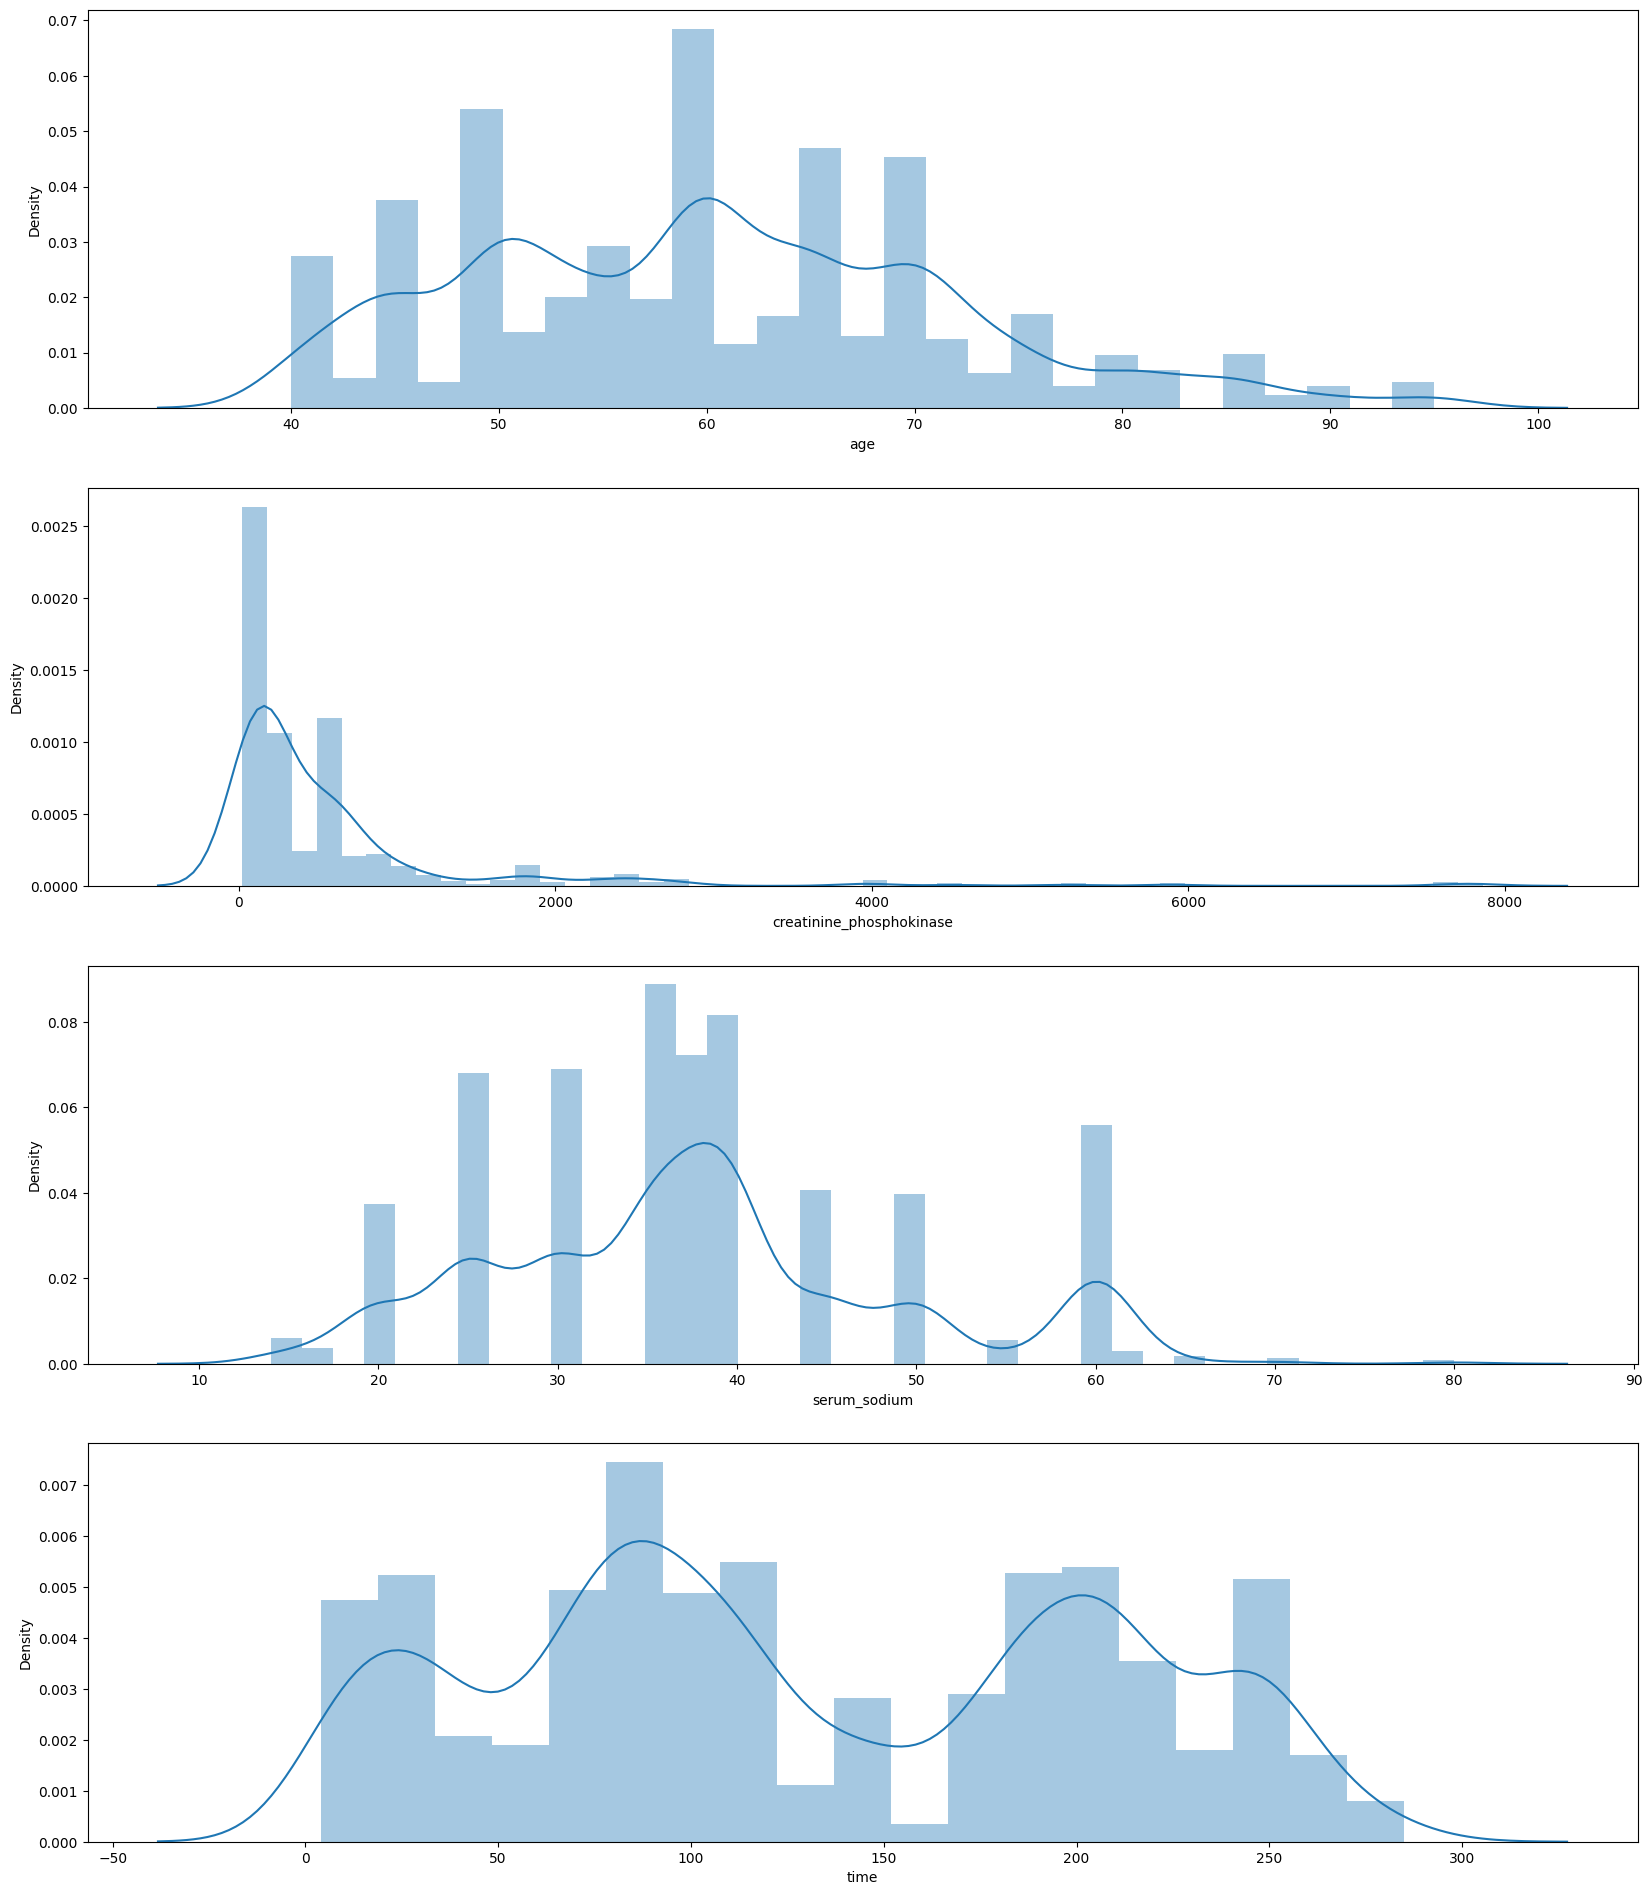

In [111]:
plt.figure(figsize=(20,30))

plt.subplot(5,1,1)
sns.distplot(df['age'])

plt.subplot(5,1,2)
sns.distplot(df['creatinine_phosphokinase'])

plt.subplot(5,1,3)
sns.distplot(df['serum_sodium'])

plt.subplot(5,1,4)
sns.distplot(df['time'])

plt.show()

### train_test_split the data


In [112]:
X = df.drop('DEATH_EVENT', axis=1) 
y = df['DEATH_EVENT']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### RandomForestClassifier Algo

In [144]:
rf_model = RandomForestClassifier(random_state=42,criterion="entropy")
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [145]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Accuracy: 0.985
Confusion Matrix:
[[689   9]
 [  6 296]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       698
           1       0.97      0.98      0.98       302

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.98      0.99      1000



In [140]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy (Best Model): {accuracy_best}")

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print(f"Confusion Matrix (Best Model):\n{conf_matrix_best}")

class_report_best = classification_report(y_test, y_pred_best)
print(f"Classification Report (Best Model):\n{class_report_best}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy (Best Model): 0.986
Confusion Matrix (Best Model):
[[691   7]
 [  7 295]]
Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       698
           1       0.98      0.98      0.98       302

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



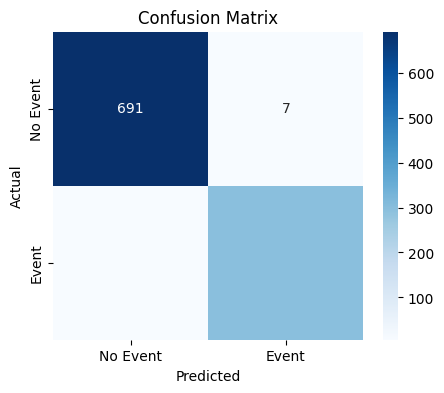

In [141]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Event', 'Event'], yticklabels=['No Event', 'Event'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

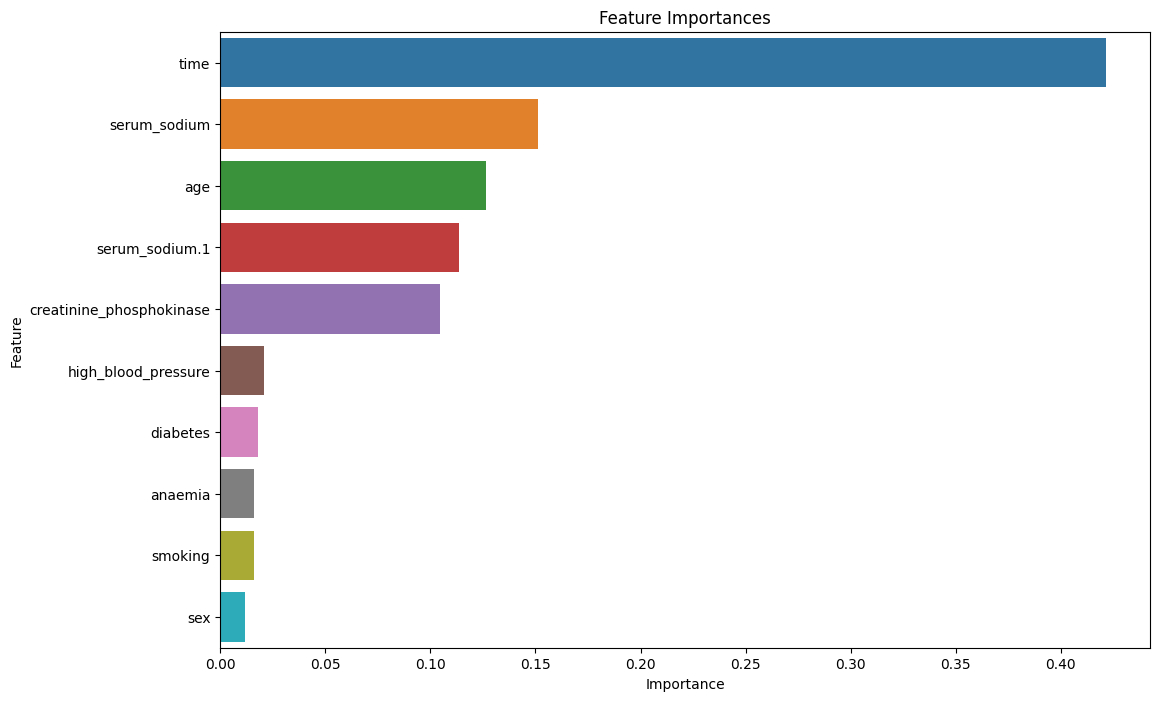

In [142]:
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

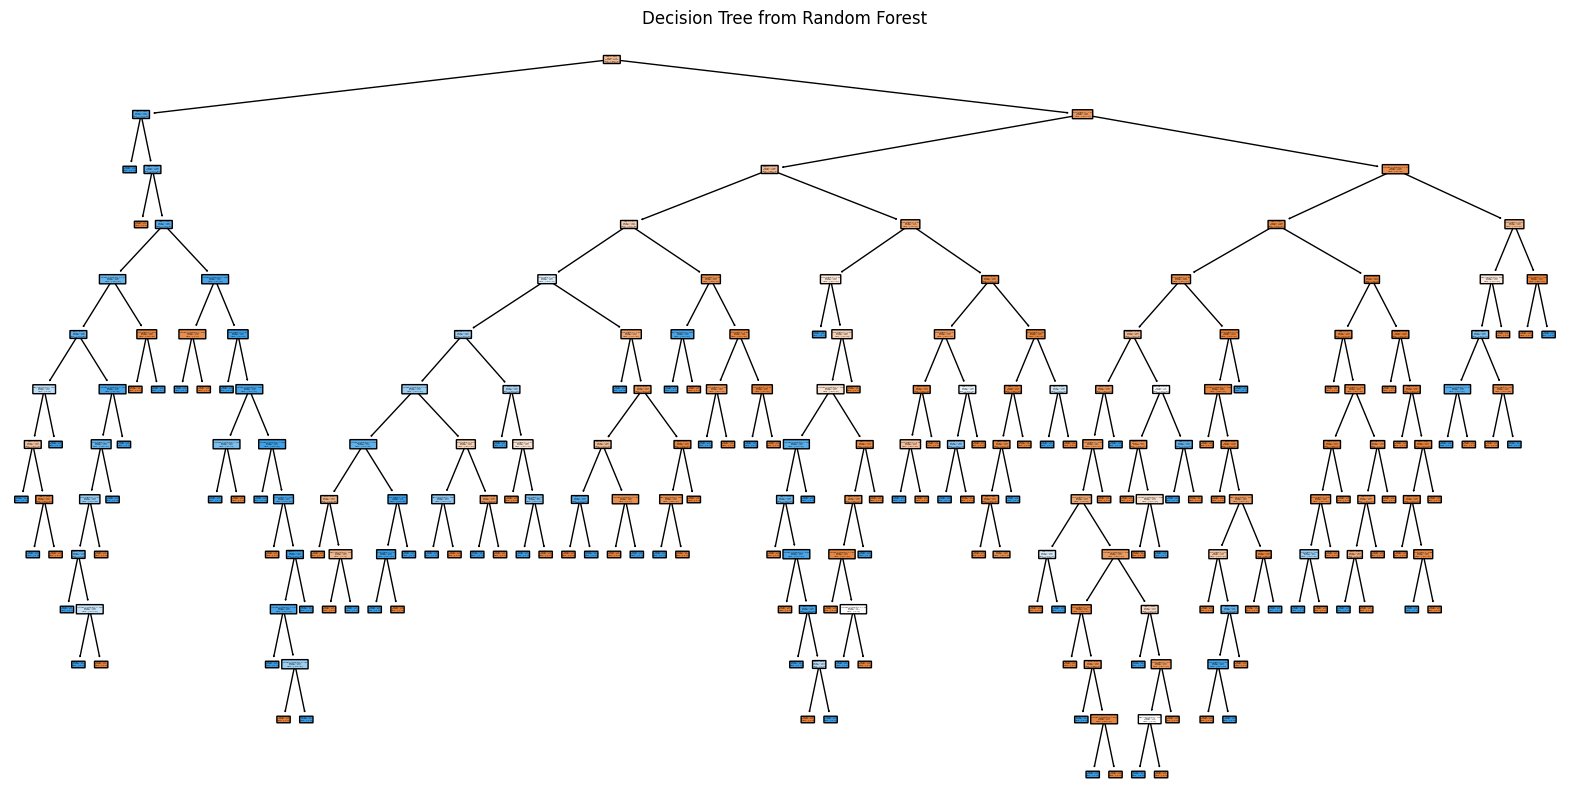

In [143]:
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], 
          feature_names=X.columns, 
          class_names=['No Event', 'Event'], 
          filled=True, 
          rounded=True, 
          proportion=True)
plt.title("Decision Tree from Random Forest")
plt.show()

In [146]:
# Evaluate the model on the training set
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Evaluate the model on the test set
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.99925
Test Accuracy: 0.985


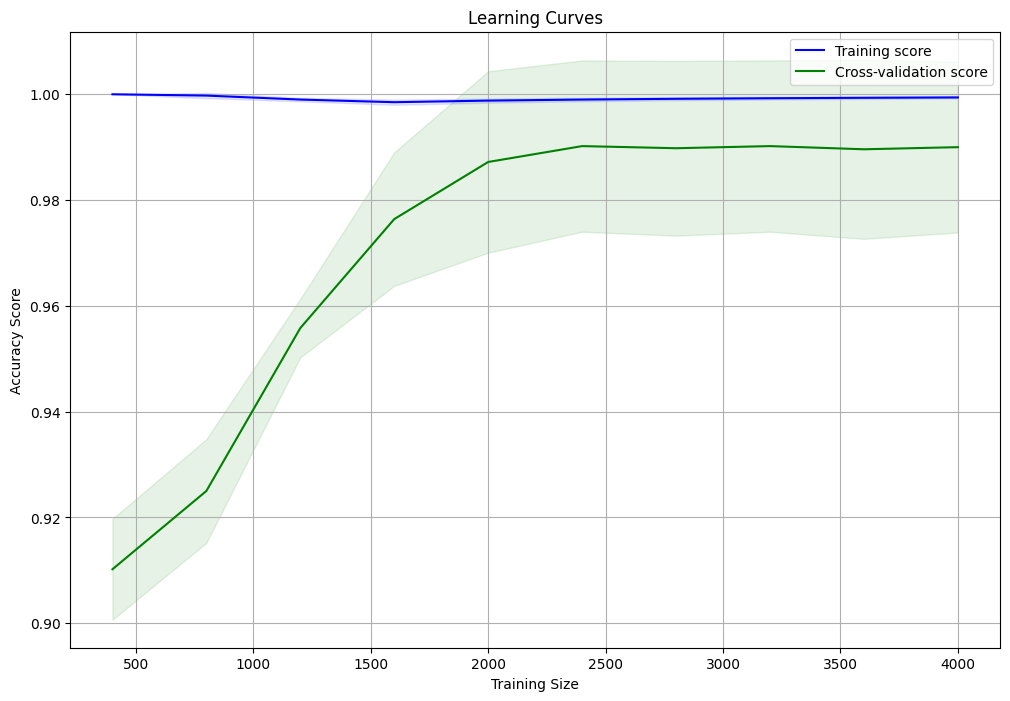

In [147]:


import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_scaled, y, cv=5, scoring='accuracy', 
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='green')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color='green', alpha=0.1)

plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()
